<a href="https://colab.research.google.com/github/lauraemmanuella/AprendizadoMaquina/blob/main/5_Exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina

/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina


# Bibliotecas necessárias

In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# 1 - Preparação dos dados

Aquisição e tratamento inicial da base: https://github.com/lauraemmanuella/TCCPUCMinas

In [ ]:
df = pd.read_csv('./bases/livrosSkoobLaura.csv', decimal=',')

## Entendendo a base

In [ ]:
# mostra quantidade de amostras
# mostra quantidade de colunas
# mostra os nomes das colunas
print('*************************************************************************')
print(f'Número de amostras: {df.shape[0]}')
print(f'Número de Colunas: {df.shape[1]}')
print(f'Nomes das Colunas: {df.columns.values}')
print('*************************************************************************')

*************************************************************************
Número de amostras: 9937
Número de Colunas: 55
Nomes das Colunas: ['titulo' 'ano' 'paginas' 'adulto' 'artes' 'autoajuda' 'aventura'
 'biografia' 'comunicação' 'contos' 'crime' 'crônica' 'culinária'
 'decoração' 'drama' 'economia' 'ensaios' 'entretenimento' 'erótico'
 'fantasia' 'ficção' 'filosofia' 'história' 'infantil' 'infantojuvenil'
 'brasileira' 'estrangeira' 'matemática' 'memórias' 'música' 'não-ficção'
 'poesias' 'policial' 'política' 'psicologia' 'religião' 'romance' 'saúde'
 'sexo' 'sociologia' 'suspense' 'terror' 'viagens' 'gender'
 'ratingcurrent' 'resenhas' 'abandonos' 'relendo' 'querem_ler' 'lendo'
 'leram' 'favoritos' 'desejados' 'trocam' 'avaliaram']
*************************************************************************


In [ ]:
df.head(3)

,titulo,ano,paginas,adulto,artes,autoajuda,aventura,biografia,comunicação,contos,crime,crônica,culinária,decoração,drama,economia,ensaios,entretenimento,erótico,fantasia,ficção,filosofia,história,infantil,infantojuvenil,brasileira,estrangeira,matemática,memórias,música,não-ficção,poesias,policial,política,psicologia,religião,romance,saúde,sexo,sociologia,suspense,terror,viagens,gender,ratingcurrent,resenhas,abandonos,relendo,querem_ler,lendo,leram,favoritos,desejados,trocam,avaliaram
0,Orçamento sem falhas,2021,128,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,F,4.4,36,0,1,1.005,50,162,12,99,2,142
1,Minha Sombria Vanessa,2020,432,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,F,4.3,819,71,2,7.274,426,3.908,549,1.260,10,3.433
2,Recursão,2020,320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,F,4.4,781,36,1,7.650,358,3.899,909,1.633,9,3.544


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9937 entries, 0 to 9936
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   titulo          9937 non-null   object
 1   ano             9937 non-null   int64 
 2   paginas         9937 non-null   int64 
 3   adulto          9937 non-null   int64 
 4   artes           9937 non-null   int64 
 5   autoajuda       9937 non-null   int64 
 6   aventura        9937 non-null   int64 
 7   biografia       9937 non-null   int64 
 8   comunicação     9937 non-null   int64 
 9   contos          9937 non-null   int64 
 10  crime           9937 non-null   int64 
 11  crônica         9937 non-null   int64 
 12  culinária       9937 non-null   int64 
 13  decoração       9937 non-null   int64 
 14  drama           9937 non-null   int64 
 15  economia        9937 non-null   int64 
 16  ensaios         9937 non-null   int64 
 17  entretenimento  9937 non-null   int64 
 18  erótico 

In [ ]:
df.describe()

,ano,paginas,adulto,artes,autoajuda,aventura,biografia,comunicação,contos,crime,crônica,culinária,decoração,drama,economia,ensaios,entretenimento,erótico,fantasia,ficção,filosofia,história,infantil,infantojuvenil,brasileira,estrangeira,matemática,memórias,música,não-ficção,poesias,policial,política,psicologia,religião,romance,saúde,sexo,sociologia,suspense,terror,viagens
count,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000
mean,2008.753749,274.941632,0.058670,0.006139,0.034920,0.026970,0.030090,0.004529,0.014189,0.013988,0.000101,0.001912,0.000503,0.019926,0.004931,0.003120,0.003623,0.012781,0.060884,0.228640,0.008856,0.029586,0.010768,0.051021,0.082218,0.348797,0.000906,0.033410,0.002918,0.045688,0.006441,0.022341,0.006742,0.011170,0.022139,0.205495,0.005434,0.000906,0.005233,0.053537,0.010365,0.001308
std,61.540942,172.921702,0.235017,0.078113,0.183586,0.162004,0.170842,0.067145,0.118277,0.117447,0.010032,0.043687,0.022427,0.139751,0.070052,0.055769,0.060084,0.112332,0.239129,0.419978,0.093692,0.169452,0.103213,0.220053,0.274710,0.476614,0.030083,0.179715,0.053946,0.208818,0.079998,0.147797,0.081839,0.105103,0.147144,0.404083,0.073520,0.030083,0.072153,0.225114,0.101286,0.036148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,170.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,4606.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Tratando colunas categóricas

In [ ]:
#remove a coluna titulo que nao sera usada
df.drop(columns = ['titulo'], inplace=True)

In [ ]:
#converte a coluna alvo (gender) de categorico para numerico
labelencoder = LabelEncoder ()
df['gender'] = labelencoder.fit_transform(df['gender']) 

In [ ]:
df.columns

Index(['ano', 'paginas', 'adulto', 'artes', 'autoajuda', 'aventura',
       'biografia', 'comunicação', 'contos', 'crime', 'crônica', 'culinária',
       'decoração', 'drama', 'economia', 'ensaios', 'entretenimento',
       'erótico', 'fantasia', 'ficção', 'filosofia', 'história', 'infantil',
       'infantojuvenil', 'brasileira', 'estrangeira', 'matemática', 'memórias',
       'música', 'não-ficção', 'poesias', 'policial', 'política', 'psicologia',
       'religião', 'romance', 'saúde', 'sexo', 'sociologia', 'suspense',
       'terror', 'viagens', 'gender', 'ratingcurrent', 'resenhas', 'abandonos',
       'relendo', 'querem_ler', 'lendo', 'leram', 'favoritos', 'desejados',
       'trocam', 'avaliaram'],
      dtype='object')

In [ ]:
generos_literarios = ['adulto', 'artes', 'autoajuda', 'aventura',
       'biografia', 'comunicação', 'contos', 'crime', 'crônica', 'culinária',
       'decoração', 'drama', 'economia', 'ensaios', 'entretenimento',
       'erótico', 'fantasia', 'ficção', 'filosofia', 'história', 'infantil',
       'infantojuvenil', 'brasileira', 'estrangeira', 'matemática', 'memórias',
       'música', 'não-ficção', 'poesias', 'policial', 'política', 'psicologia',
       'religião', 'romance', 'saúde', 'sexo', 'sociologia', 'suspense',
       'terror', 'viagens']

In [ ]:
estatisticas = ['ratingcurrent','resenhas', 'abandonos',
       'relendo', 'querem_ler', 'lendo', 'leram', 'favoritos', 'desejados',
       'trocam', 'avaliaram']

In [ ]:
#remove o ponto dos campos que representam uma contagem e estão como object para transformar em numeric
df[estatisticas] = df[estatisticas].apply(lambda x: x.str.replace('.', ''))

In [ ]:
#transforma em numeric
df = df.apply(pd.to_numeric)

In [ ]:
df.head(3)

,ano,paginas,adulto,artes,autoajuda,aventura,biografia,comunicação,contos,crime,crônica,culinária,decoração,drama,economia,ensaios,entretenimento,erótico,fantasia,ficção,filosofia,história,infantil,infantojuvenil,brasileira,estrangeira,matemática,memórias,música,não-ficção,poesias,policial,política,psicologia,religião,romance,saúde,sexo,sociologia,suspense,terror,viagens,gender,ratingcurrent,resenhas,abandonos,relendo,querem_ler,lendo,leram,favoritos,desejados,trocam,avaliaram
0,2021,128,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,44,36,0,1,1005,50,162,12,99,2,142
1,2020,432,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,43,819,71,2,7274,426,3908,549,1260,10,3433
2,2020,320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,781,36,1,7650,358,3899,909,1633,9,3544


## Balanceamento da base

Balanceamento da base em relação às classes Feminino e Masculino usando undersampling

In [ ]:
#verifica desbalanceamento em relação ao gender
#Observe que aqui estou usando os rótulos usando o inverse_transform
pd.Series(labelencoder.inverse_transform(df['gender'])).value_counts()

F    8647
M    1290
dtype: int64

In [ ]:
gender = ((df['gender'].value_counts()/len(df)).round(3)*100)
print('Percentual de exemplos de cada possível classe (%)')
print(gender)

Percentual de exemplos de cada possível classe (%)
0    87.0
1    13.0
Name: gender, dtype: float64


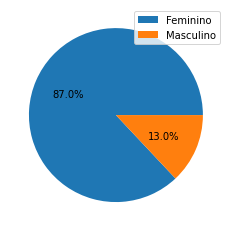

In [ ]:
plt.pie(gender, autopct='%1.1f%%')
plt.legend(['Feminino', 'Masculino'],loc= 'upper right')
plt.show()

In [ ]:
#faz reamostragem para balancear as classes
nm = NearMiss()
X_res, y_res = nm.fit_resample(df.drop(columns=['gender']), df['gender'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#gera dataframe com os dados balanceados
dfBalanceado = pd.DataFrame(X_res, columns=df.columns.drop('gender'))

In [ ]:
#acrescenta coluna alvo
dfBalanceado['gender'] = pd.Series(y_res)

In [ ]:
#mostra quantidade de amostra de cada classe (feminino e masculino)
dfBalanceado['gender'].value_counts()

1    1290
0    1290
Name: gender, dtype: int64

In [ ]:
dfBalanceado.describe()

,ano,paginas,adulto,artes,autoajuda,aventura,biografia,comunicação,contos,crime,crônica,culinária,decoração,drama,economia,ensaios,entretenimento,erótico,fantasia,ficção,filosofia,história,infantil,infantojuvenil,brasileira,estrangeira,matemática,memórias,música,não-ficção,poesias,policial,política,psicologia,religião,romance,saúde,sexo,sociologia,suspense,terror,viagens,ratingcurrent,resenhas,abandonos,relendo,querem_ler,lendo,leram,favoritos,desejados,trocam,avaliaram,gender
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.0,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,2004.133333,229.953488,0.002713,0.006589,0.016667,0.009302,0.024806,0.004651,0.007752,0.005814,0.0,0.002326,0.000388,0.006202,0.010853,0.003876,0.003101,0.000775,0.013953,0.060853,0.017442,0.031395,0.003488,0.012791,0.037209,0.094186,0.001938,0.027907,0.002713,0.032558,0.004264,0.005039,0.007752,0.010078,0.017829,0.036434,0.004264,0.000775,0.003488,0.013566,0.003101,0.002713,37.121705,4.138760,5.874031,0.522868,165.746124,15.074806,140.076357,14.427519,29.538372,2.778682,84.987984,0.500000
std,68.848334,149.942753,0.052028,0.080921,0.128044,0.096018,0.155564,0.068054,0.087720,0.076042,0.0,0.048178,0.019687,0.078521,0.103630,0.062149,0.055609,0.027837,0.117321,0.239106,0.130936,0.174418,0.058971,0.112392,0.189311,0.292144,0.043988,0.164738,0.052028,0.177511,0.065169,0.070819,0.087720,0.099899,0.132357,0.187404,0.065169,0.027837,0.058971,0.115702,0.055609,0.052028,8.076596,19.390903,55.545098,5.066814,870.358376,88.582190,806.855135,120.777758,135.642862,11.124601,468.476846,0.500097
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,6.000000,0.000000,6.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,2008.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000,17.000000,1.000000,15.000000,1.000000,3.000000,1.000000,9.000000,0.500000
75%,2011.000000,290.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,1.0000

## Removendo colunas zeradas

In [ ]:
#cria uma série com a quantidade de amostras de cada gênero e seus nomes
qtdGeneros = pd.Series(dfBalanceado[generos_literarios].sum(), index=dfBalanceado[generos_literarios].sum().index)

In [ ]:
qtdGeneros

adulto              7
artes              17
autoajuda          43
aventura           24
biografia          64
comunicação        12
contos             20
crime              15
crônica             0
culinária           6
decoração           1
drama              16
economia           28
ensaios            10
entretenimento      8
erótico             2
fantasia           36
ficção            157
filosofia          45
história           81
infantil            9
infantojuvenil     33
brasileira         96
estrangeira       243
matemática          5
memórias           72
música              7
não-ficção         84
poesias            11
policial           13
política           20
psicologia         26
religião           46
romance            94
saúde              11
sexo                2
sociologia          9
suspense           35
terror              8
viagens             7
dtype: int64

In [ ]:
#Percorre série criada anteriormente para remover as colunas com 0 ocorrências
for i, v in qtdGeneros.items():
    if v == 0:
      dfBalanceado.drop(columns=[i], inplace=True)

In [ ]:
dfBalanceado.columns

Index(['ano', 'paginas', 'adulto', 'artes', 'autoajuda', 'aventura',
       'biografia', 'comunicação', 'contos', 'crime', 'culinária', 'decoração',
       'drama', 'economia', 'ensaios', 'entretenimento', 'erótico', 'fantasia',
       'ficção', 'filosofia', 'história', 'infantil', 'infantojuvenil',
       'brasileira', 'estrangeira', 'matemática', 'memórias', 'música',
       'não-ficção', 'poesias', 'policial', 'política', 'psicologia',
       'religião', 'romance', 'saúde', 'sexo', 'sociologia', 'suspense',
       'terror', 'viagens', 'ratingcurrent', 'resenhas', 'abandonos',
       'relendo', 'querem_ler', 'lendo', 'leram', 'favoritos', 'desejados',
       'trocam', 'avaliaram', 'gender'],
      dtype='object')

In [ ]:
#atualizando a lista
generos_literarios = ['adulto', 'artes', 'autoajuda', 'aventura',
       'biografia', 'comunicação', 'contos', 'crime', 'culinária', 'decoração',
       'drama', 'economia', 'ensaios', 'entretenimento', 'erótico', 'fantasia',
       'ficção', 'filosofia', 'história', 'infantil', 'infantojuvenil',
       'brasileira', 'estrangeira', 'matemática', 'memórias', 'música',
       'não-ficção', 'poesias', 'policial', 'política', 'psicologia',
       'religião', 'romance', 'saúde', 'sexo', 'sociologia', 'suspense',
       'terror', 'viagens']

In [ ]:
dfBalanceado.describe()

,ano,paginas,adulto,artes,autoajuda,aventura,biografia,comunicação,contos,crime,culinária,decoração,drama,economia,ensaios,entretenimento,erótico,fantasia,ficção,filosofia,história,infantil,infantojuvenil,brasileira,estrangeira,matemática,memórias,música,não-ficção,poesias,policial,política,psicologia,religião,romance,saúde,sexo,sociologia,suspense,terror,viagens,ratingcurrent,resenhas,abandonos,relendo,querem_ler,lendo,leram,favoritos,desejados,trocam,avaliaram,gender
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,2004.133333,229.953488,0.002713,0.006589,0.016667,0.009302,0.024806,0.004651,0.007752,0.005814,0.002326,0.000388,0.006202,0.010853,0.003876,0.003101,0.000775,0.013953,0.060853,0.017442,0.031395,0.003488,0.012791,0.037209,0.094186,0.001938,0.027907,0.002713,0.032558,0.004264,0.005039,0.007752,0.010078,0.017829,0.036434,0.004264,0.000775,0.003488,0.013566,0.003101,0.002713,37.121705,4.138760,5.874031,0.522868,165.746124,15.074806,140.076357,14.427519,29.538372,2.778682,84.987984,0.500000
std,68.848334,149.942753,0.052028,0.080921,0.128044,0.096018,0.155564,0.068054,0.087720,0.076042,0.048178,0.019687,0.078521,0.103630,0.062149,0.055609,0.027837,0.117321,0.239106,0.130936,0.174418,0.058971,0.112392,0.189311,0.292144,0.043988,0.164738,0.052028,0.177511,0.065169,0.070819,0.087720,0.099899,0.132357,0.187404,0.065169,0.027837,0.058971,0.115702,0.055609,0.052028,8.076596,19.390903,55.545098,5.066814,870.358376,88.582190,806.855135,120.777758,135.642862,11.124601,468.476846,0.500097
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,6.000000,0.000000,6.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,2008.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000,17.000000,1.000000,15.000000,1.000000,3.000000,1.000000,9.000000,0.500000
75%,2011.000000,290.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,1.000000,2.000000,0.000000,47.000000,4.000000

In [ ]:
#guarda base balanceada
dfBalanceado.to_csv('./bases/skoobBaseBalanceada.csv',index=False)

## Mudança de escala

OBS: Os resultados do knn para essa base são melhores com base sem fazer a reescala

In [ ]:
#acrescenta ano e páginas à lista de estatísticas
estatisticas.extend(['ano', 'paginas'])

In [ ]:
# Mudança de escala (0-1)
#A reescala usando StandardScaler (que modifica a distribuição dos dados para a normal - média 0 e desvio padrão 1)
#deu melhores resultados do que o MinMaxScaler (que mantem a distribuição original dos dados)
dfBalanceado[estatisticas] = StandardScaler().fit_transform(dfBalanceado[estatisticas])

In [ ]:
dfBalanceado.describe()

,ano,paginas,adulto,artes,autoajuda,aventura,biografia,comunicação,contos,crime,culinária,decoração,drama,economia,ensaios,entretenimento,erótico,fantasia,ficção,filosofia,história,infantil,infantojuvenil,brasileira,estrangeira,matemática,memórias,música,não-ficção,poesias,policial,política,psicologia,religião,romance,saúde,sexo,sociologia,suspense,terror,viagens,ratingcurrent,resenhas,abandonos,relendo,querem_ler,lendo,leram,favoritos,desejados,trocam,avaliaram,gender
count,2.580000e+03,2.580000e+03,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2.580000e+03,2.580000e+03,2.580000e+03,2.580000e+03,2.580000e+03,2.580000e+03,2.580000e+03,2.580000e+03,2.580000e+03,2.580000e+03,2.580000e+03,2580.000000
mean,-1.448196e-15,-1.529569e-16,0.002713,0.006589,0.016667,0.009302,0.024806,0.004651,0.007752,0.005814,0.002326,0.000388,0.006202,0.010853,0.003876,0.003101,0.000775,0.013953,0.060853,0.017442,0.031395,0.003488,0.012791,0.037209,0.094186,0.001938,0.027907,0.002713,0.032558,0.004264,0.005039,0.007752,0.010078,0.017829,0.036434,0.004264,0.000775,0.003488,0.013566,0.003101,0.002713,-1.174771e-16,4.219268e-16,-1.478033e-15,-1.454650e-15,-3.696494e-16,-2.707782e-17,3.703433e-17,4.348911e-16,-1.784382e-15,-4.945549e-16,-8.841711e-17,0.500000
std,1.000194e+00,1.000194e+00,0.052028,0.080921,0.128044,0.096018,0.155564,0.068054,0.087720,0.076042,0.048178,0.019687,0.078521,0.103630,0.062149,0.055609,0.027837,0.117321,0.239106,0.130936,0.174418,0.058971,0.112392,0.189311,0.292144,0.043988,0.164738,0.052028,0.177511,0.065169,0.070819,0.087720,0.099899,0.132357,0.187404,0.065169,0.027837,0.058971,0.115702,0.055609,0.052028,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,0.500097
min,-2.911504e+01,-1.533906e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.597098e+00,-2.134796e-01,-1.057730e-01,-1.032147e-01,-1.904713e-01,-1.702117e-01,-1.736415e-01,-1.194783e-01,-2.178080e-01,-2.498266e-01,-1.814486e-01,0.000000
25%,-1.646449e-02,-6.533992e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.865874e-01,-2.134796e-01,-1.057730e-01,-1.032147e-01,-1.835762e-01,-1.702117e-01,-1.662037e-01,-1.194783e-01,-2.104343e-01,-2.498266e-01,-1.729086e-01,0.000000
50%,5.617298e-02,-1.998049e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.087667e-01,-2.134796e-01,-1.057730e-01,-1.032147e-01,-1.709353e-01,-1.589206e-01,-1.550472e-01,-1.111970e-01,-1.956868e-01,-1.599183e-01,-1.622337e-01,0.500000
75%,9.975547e-02,4.005405e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

## Analisando as correlações

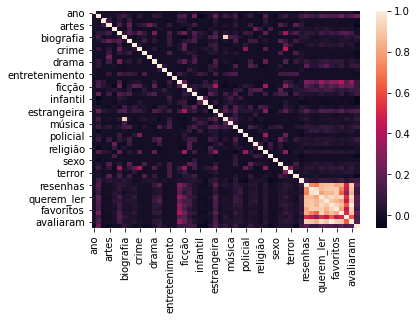

In [ ]:
#apresenta correlações positivas
sns.heatmap(dfBalanceado.corr())

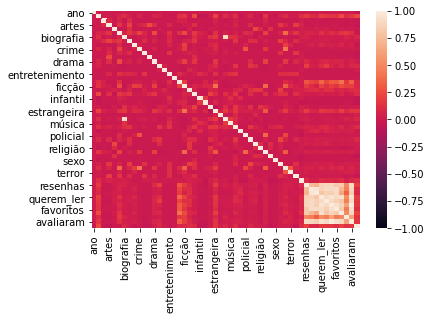

In [ ]:
#apresenta correlações positivas e negativas
sns.heatmap(dfBalanceado.corr(), vmin = -1)

## Seleção de atributos

OBS: Os resultados do knn para essa base removendo as colunas de estatísticas ficam muito baixos. Ao remover as colunas de gêneros literários diminui um pouco o desempenho, mas é quase a mesma coisa de manter a base completa. De qualquer forma, opto por manter a base completa.

In [ ]:
#Teste removendo as colunas sobre estatísticas
estatisticas.extend(['ano', 'paginas'])
dfBalanceado.drop(columns=estatisticas, inplace=True)

#Resultados ficaram muito baixos!!

In [ ]:
#Teste removendo as colunas sobre gêneros literários
dfBalanceado.drop(columns=generos_literarios, inplace=True)

#Resultados ficam quase iguais aos resultados com a base completa

# 2 - Classificação

Aplicando algoritmos de AM



In [4]:
#Predições com a base balanceada
dfBalanceado = pd.read_csv('./bases/skoobBaseBalanceada.csv')

In [5]:
#dividindo a base
X_train, X_test, y_train, y_test = train_test_split(dfBalanceado.drop(columns=['gender']), dfBalanceado['gender'],test_size=0.33, stratify=dfBalanceado['gender'])

## 2.1 - KNN

### Definição dos melhores parâmetros para o KNN usando GridSearchCV




In [6]:
#define os parâmetros a serem testados com o KNN
param_grid_knn = {'n_neighbors': range(1,40,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
#cria o objeto do gridsearchcv
gridknn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring = 'f1_weighted', cv = 10, verbose = 1)
#executa o gridsearchcv para a base separando X e y
gridknn.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   55.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=1)

In [7]:
gridknn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=3,
                     weights='distance')

In [8]:
gridknn.best_score_

0.7704108555642244

In [9]:
dfGridSearch = pd.DataFrame(gridknn.cv_results_)

In [10]:
dfGridSearch.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008456,0.001132,0.015072,0.002775,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.750979,0.664605,0.658937,0.635838,0.681762,0.698859,0.722023,0.687861,0.644760,0.643311,0.678894,0.035258,119
1,0.008447,0.000313,0.009475,0.000859,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.750979,0.664605,0.658937,0.635838,0.681762,0.698859,0.722023,0.687861,0.644760,0.643311,0.678894,0.035258,119
2,0.008535,0.000511,0.012098,0.000442,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.733463,0.670520,0.682060,0.664740,0.710789,0.687840,0.756770,0.687653,0.673713,0.700563,0.696811,0.027898,115


In [ ]:
#salvando o resultado do gridsearch
dfGridSearch.to_csv('./bases/skoobresultadogridsearchKNN.csv', index=False)

### Analise da matriz de confusão para o conjunto de teste


In [11]:
grid_predictions = gridknn.predict(X_test)

In [12]:
print(metrics.classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       426
           1       0.91      0.59      0.72       426

    accuracy                           0.77       852
   macro avg       0.80      0.77      0.76       852
weighted avg       0.80      0.77      0.76       852



### Classe runmodel 

Essa classe permite a execução das técnicas de amostragem de dados para avaliação das métricas accuracy, precision, recall e f1-score por classe. Implementa a amostragem aleatória com N holdouts (train_test_splits) e a validação cruzada com estratificação e embaralhamento, permitindo a execução de N validações cruzadas.

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

class runmodel:
  '''
    Parâmetros de entrada:

    X: atributos de entradas
    y: atributo alvo
    model: algoritmo para construção do estimador
    cv: se None faz N holdouts, se int faz validação cruzada (ambos com estratificação por classe)
    n = quantidade de repetições da amostragem

    Guardar as métricas de cada execução (armazenametricas) e 
    Mostrar os valores médios com desvio padrão para as métricas (mostraresultadomedio) 

    Se dataset tiver mais de 2 classes, adaptar resultados    
  '''

  def __init__(self, X, y, model, cv = None, n = 1):
    
    self.__resultados = {
      'precision_0': [],
      'recall_0': [],
      'f1_0': [],
      'support_0': [],
      'precision_1': [],
      'recall_1': [],
      'f1_1': [],
      'support_1' : [],
      'accuracy' : [],
      'precision_wavg' : [],
      'recall_wavg' : [],
      'f1_wavg' : [],
      'support_wavg' : []
    }

    if cv is None:
      print(f'{n} holdouts')
      for i in range(n):
        self.__avaliamodelo(X, y, model)
    
    else:
      print(f'{n} validação cruzada com {cv} folds')
      for i in range(n):
        self.__avaliamodelo_cv(X, y, model, cv)

  @property
  def resultados(self):
    return self.__resultados

  def __avaliamodelo(self, X, y, model):
    #gera as amostras de treino (2/3) e teste (1/3) com estratificação por classe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)
    # Treina o modelo usando os dados de treino
    model.fit(X_train,y_train)
    # Testa modelo usando os dados de teste
    pred = model.predict(X_test)
    #armazena resultado
    self.__armazenametricas(metrics.classification_report(y_test,pred, output_dict= True))

  def __avaliamodelo_cv(self, X, y, model, cv):
    #gera as amostras para cv folds com embaralhamento (permite fazer várias validações cruzadas)
    skf = StratifiedKFold(shuffle=True, n_splits=cv)
    #para cada fold: treina, testa e armazena os resultados
    for train_index, test_index in skf.split(X, y):
      model.fit(X.iloc[train_index], y.iloc[train_index])
      pred = model.predict(X.iloc[test_index])
      self.__armazenametricas(metrics.classification_report(y.iloc[test_index], pred, output_dict= True))

  def __armazenametricas(self, d):
    self.__resultados['precision_0'].append(d['0']['precision'])
    self.__resultados['recall_0'].append(d['0']['recall'])
    self.__resultados['f1_0'].append(d['0']['f1-score'])
    self.__resultados['support_0'].append(d['0']['support'])

    self.__resultados['precision_1'].append(d['1']['precision'])
    self.__resultados['recall_1'].append(d['1']['recall'])
    self.__resultados['f1_1'].append(d['1']['f1-score'])
    self.__resultados['support_1'].append(d['1']['support'])

    self.__resultados['accuracy'].append(d['accuracy'])
    
    self.__resultados['precision_wavg'].append(d['weighted avg']['precision'])
    self.__resultados['recall_wavg'].append(d['weighted avg']['recall'])
    self.__resultados['f1_wavg'].append(d['weighted avg']['f1-score'])
    self.__resultados['support_wavg'].append(d['weighted avg']['support'])

  def mostraresultadomedio(self):
    print(f"\t\t precision \t recall \t f1-score \t support\n")
    print(f"0 \t\t {round(np.mean(self.__resultados['precision_0']), 2)}({round(np.std(self.__resultados['precision_0']),2)}) \t {round(np.mean(self.__resultados['recall_0']),2)}({round(np.std(self.__resultados['recall_0']),2)}) \t {round(np.mean(self.__resultados['f1_0']),2)}({round(np.std(self.__resultados['f1_0']),2)}) \t {round(np.mean(self.__resultados['support_0']),2)}({round(np.std(self.__resultados['support_0']),2)})\n")
    print(f"1 \t\t {round(np.mean(self.__resultados['precision_1']), 2)}({round(np.std(self.__resultados['precision_1']),2)}) \t {round(np.mean(self.__resultados['recall_1']),2)}({round(np.std(self.__resultados['recall_1']),2)}) \t {round(np.mean(self.__resultados['f1_1']),2)}({round(np.std(self.__resultados['f1_1']),2)}) \t {round(np.mean(self.__resultados['support_1']),2)}({round(np.std(self.__resultados['support_1']),2)})\n")
    print(f"accuracy \t\t  \t\t  \t {round(np.mean(self.__resultados['accuracy']), 2)}({round(np.std(self.__resultados['accuracy']),2)}) \t\t \n")
    print(f"weighted avg \t {round(np.mean(self.__resultados['precision_wavg']), 2)}({round(np.std(self.__resultados['precision_wavg']),2)}) \t {round(np.mean(self.__resultados['recall_wavg']),2)}({round(np.std(self.__resultados['recall_wavg']),2)}) \t {round(np.mean(self.__resultados['f1_wavg']),2)}({round(np.std(self.__resultados['f1_wavg']),2)}) \t {round(np.mean(self.__resultados['support_wavg']),2)}({round(np.std(self.__resultados['support_wavg']),2)})\n")

### Teste com amostragem aleatória (N holdouts) 
Usando o algoritmo com os parâmetros encontrados pelo GridSearchCV





In [14]:
knn = gridknn.best_estimator_

amostragem_aleatoria_knn = runmodel(dfBalanceado.drop(columns=['gender']), dfBalanceado['gender'], knn, n = 10)

10 holdouts


In [15]:
print('\tMédia e desvio padrão de 10 execuções do KNN com amostragem aleatória\n')
amostragem_aleatoria_knn.mostraresultadomedio()

	Média e desvio padrão de 10 execuções do KNN com amostragem aleatória

		 precision 	 recall 	 f1-score 	 support

0 		 0.7(0.01) 	 0.94(0.01) 	 0.8(0.01) 	 426.0(0.0)

1 		 0.91(0.01) 	 0.6(0.02) 	 0.72(0.01) 	 426.0(0.0)

accuracy 		  		  	 0.77(0.01) 		 

weighted avg 	 0.81(0.01) 	 0.77(0.01) 	 0.76(0.01) 	 852.0(0.0)



### Teste com validação cruzada 
Usando o algoritmo com os parâmetros encontrados pelo GridSearchCV

In [18]:
cross_validation_knn = runmodel(dfBalanceado.drop(columns=['gender']), dfBalanceado['gender'], knn, cv = 10, n = 1 )

1 validação cruzada com 10 folds


In [19]:
print('\tMédia e desvio padrão do KNN com 10 fold cross validation\n')
cross_validation_knn.mostraresultadomedio()

	Média e desvio padrão do KNN com 10 fold cross validation

		 precision 	 recall 	 f1-score 	 support

0 		 0.7(0.01) 	 0.93(0.03) 	 0.8(0.01) 	 129.0(0.0)

1 		 0.89(0.03) 	 0.6(0.02) 	 0.72(0.01) 	 129.0(0.0)

accuracy 		  		  	 0.76(0.01) 		 

weighted avg 	 0.79(0.02) 	 0.76(0.01) 	 0.76(0.01) 	 258.0(0.0)



## 2.2 - Naive

In [20]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Analise da matriz de confusão para o conjunto de teste

In [21]:
pred = model.predict(X_test)

print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.98      0.78       426
           1       0.95      0.46      0.62       426

    accuracy                           0.72       852
   macro avg       0.80      0.72      0.70       852
weighted avg       0.80      0.72      0.70       852



### Teste com amostragem aleatória

In [24]:
amostragem_aleatoria_naive = runmodel(dfBalanceado.drop(columns=['gender']), dfBalanceado['gender'], GaussianNB(), n = 10)

10 holdouts


In [25]:
print('\tMédia e desvio padrão de 10 execuções do Naive Bayes com amostragem aleatória\n')
amostragem_aleatoria_naive.mostraresultadomedio()

	Média e desvio padrão de 10 execuções do Naive Bayes com amostragem aleatória

		 precision 	 recall 	 f1-score 	 support

0 		 0.65(0.01) 	 0.97(0.01) 	 0.77(0.01) 	 426.0(0.0)

1 		 0.93(0.02) 	 0.47(0.02) 	 0.63(0.02) 	 426.0(0.0)

accuracy 		  		  	 0.72(0.01) 		 

weighted avg 	 0.79(0.01) 	 0.72(0.01) 	 0.7(0.01) 	 852.0(0.0)



### Teste com validação cruzada

In [26]:
cross_validation_naive = runmodel(dfBalanceado.drop(columns=['gender']), dfBalanceado['gender'], GaussianNB(), cv = 10, n = 1 )

1 validação cruzada com 10 folds


In [27]:
print('\tMédia e desvio padrão do Naive com 10 fold cross validation\n')
cross_validation_naive.mostraresultadomedio()

	Média e desvio padrão do Naive com 10 fold cross validation

		 precision 	 recall 	 f1-score 	 support

0 		 0.64(0.02) 	 0.97(0.02) 	 0.77(0.02) 	 129.0(0.0)

1 		 0.93(0.03) 	 0.46(0.04) 	 0.62(0.04) 	 129.0(0.0)

accuracy 		  		  	 0.72(0.02) 		 

weighted avg 	 0.79(0.02) 	 0.72(0.02) 	 0.7(0.03) 	 258.0(0.0)



#Continua...

## 2.3 - SVM

## 2.4 - MLP

## 2.5 - Teste de Hipótese